In [ ]:
# import libraries

from nba_api.stats.endpoints import leagueleaders
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
# get current season leaders
# leagueleaders uses various stats to define top players
leaders = leagueleaders.LeagueLeaders(
    season='2024-25', # current season
    stat_category_abbreviation='PTS' # points
)

# convert to dataframe
leaders_df = leaders.get_data_frames()[0]

# look at results
print(f"Total players: {len(leaders_df)}")
print("\nColumns available:")
print(leaders_df.columns.tolist())

Total players: 569

Columns available:
['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF', 'AST_TOV', 'STL_TOV']


In [ ]:
# get top 10 scorers
top_scorers = leaders_df.head(10)

# show names and PPG
print("Top 10 Scorers 2024-25:")
print(top_scorers[['PLAYER', 'PTS', 'GP',]].to_string(index=False))

Top 10 Scorers 2024-25:
                 PLAYER  PTS  GP
Shai Gilgeous-Alexander 2484  76
        Anthony Edwards 2177  79
           Nikola Jokić 2071  70
  Giannis Antetokounmpo 2036  67
           Jayson Tatum 1932  72
           Devin Booker 1923  75
             Trae Young 1841  76
            Tyler Herro 1840  77
        Cade Cunningham 1830  70
           James Harden 1802  79


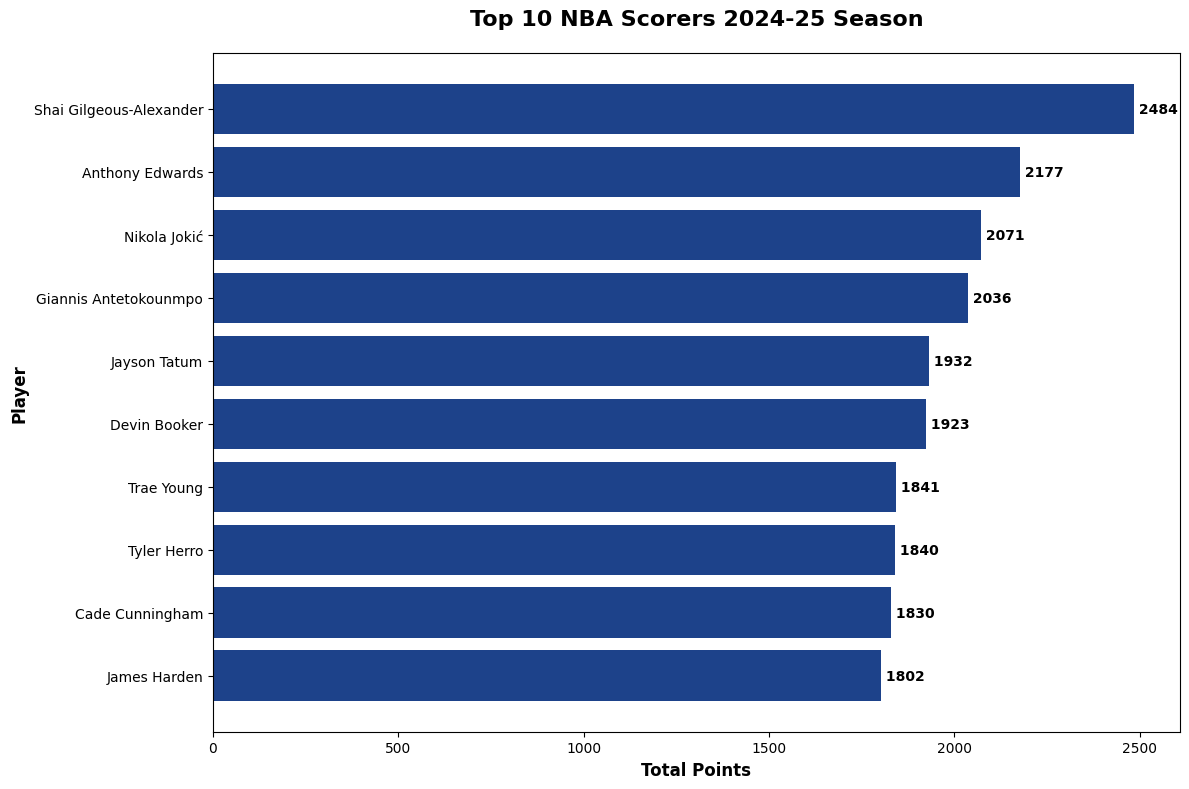


Chart saved as 'top_10_scorers_2024-25.png' in the visualizations folder.


In [ ]:
# bar chart
plt.figure(figsize=(12,8))

# horizontal - easier to read names
plt.barh(top_scorers['PLAYER'], top_scorers['PTS'], color='#1d428a') # NBA blue

plt.xlabel('Total Points', fontsize=12, fontweight='bold')
plt.ylabel('Player', fontsize=12, fontweight='bold')
plt.title('Top 10 NBA Scorers 2024-25 Season', fontsize=16, fontweight='bold', pad=20)

# invert y-axis so top scorer is at top
plt.gca().invert_yaxis()

# add value labels on bars
for i, (player, points) in enumerate(zip(top_scorers['PLAYER'], top_scorers['PTS'])):
    plt.text(points, i, f' {int(points)}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../visualizations/top_10_scorers_2024-25.png')
plt.show()

print("\nChart saved as 'top_10_scorers_2024-25.png' in the visualizations folder.")

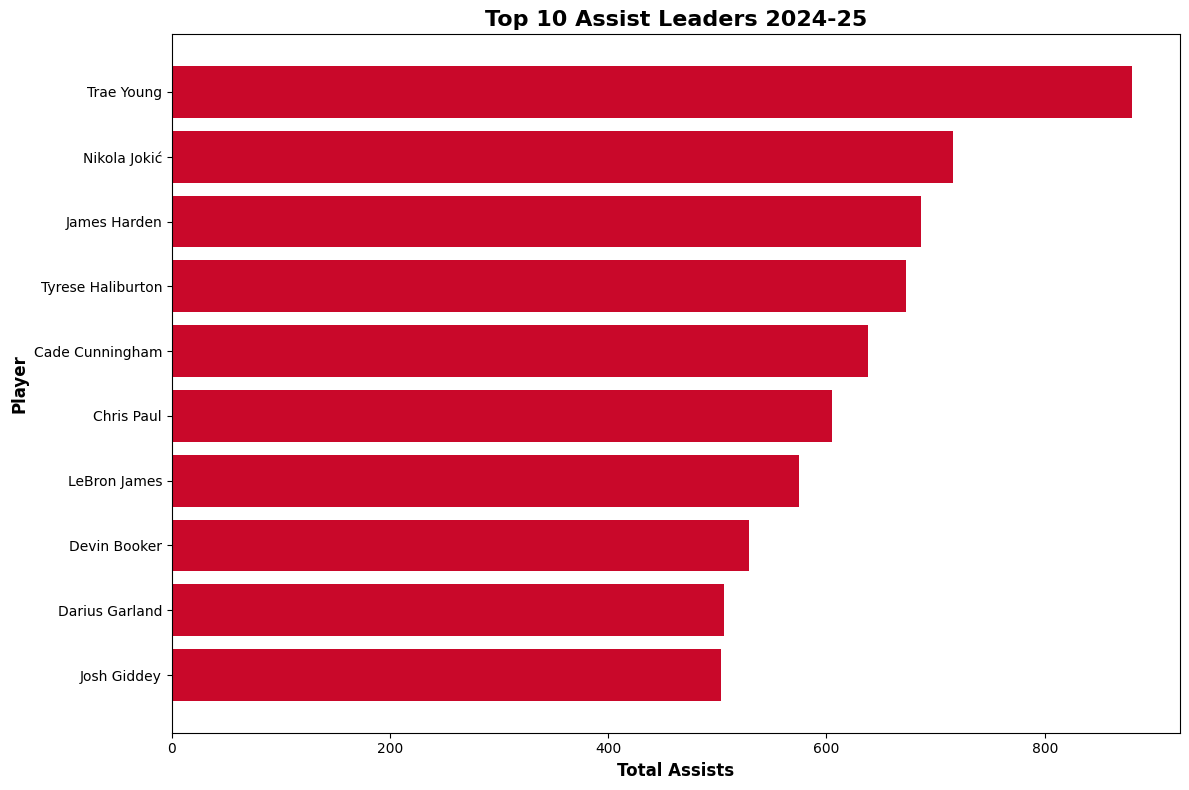

In [ ]:
# assist leaders
assist_leaders = leagueleaders.LeagueLeaders(
    season = '2024-25',
    stat_category_abbreviation = 'AST'
)
ast_df = assist_leaders.get_data_frames()[0]
top_10_ast = ast_df.head(10)

plt.figure(figsize = (12,8))
plt.barh(top_10_ast['PLAYER'], top_10_ast['AST'], color = '#C9082A')
plt.xlabel('Total Assists', fontsize = 12, fontweight = 'bold')
plt.ylabel('Player', fontsize = 12, fontweight = 'bold')
plt.title('Top 10 Assist Leaders 2024-25', fontsize = 16, fontweight = 'bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_10_assist_leaders.png', dpi = 300, bbox_inches = 'tight')
plt.show()